In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import squarify

data=pd.read_csv('C:/Users/berie/Downloads/Compressed/Apple-Fitness-Data.csv')

In [3]:
print(data)

           Date       Time  Step Count  Distance  Energy Burned  \
0    2023-03-21  16:01:23           46   0.02543         14.620   
1    2023-03-21  16:18:37          645   0.40041         14.722   
2    2023-03-21  16:31:38           14   0.00996         14.603   
3    2023-03-21  16:45:37           13   0.00901         14.811   
4    2023-03-21  17:10:30           17   0.00904         15.153   
..          ...        ...         ...       ...            ...   
144  2023-04-01  16:04:23           87   0.05872         13.162   
145  2023-04-01  16:33:18           37   0.02039          4.135   
146  2023-04-01  16:49:49          969   0.65379         31.416   
147  2023-04-01  17:09:06          640   0.42356         13.250   
148  2023-04-01  17:47:07         1081   0.67835         14.131   

     Flights Climbed  Walking Double Support Percentage  Walking Speed  
0                  3                              0.304          3.060  
1                  3                             

In [4]:
print(data.isnull().sum())

Date                                 0
Time                                 0
Step Count                           0
Distance                             0
Energy Burned                        0
Flights Climbed                      0
Walking Double Support Percentage    0
Walking Speed                        0
dtype: int64


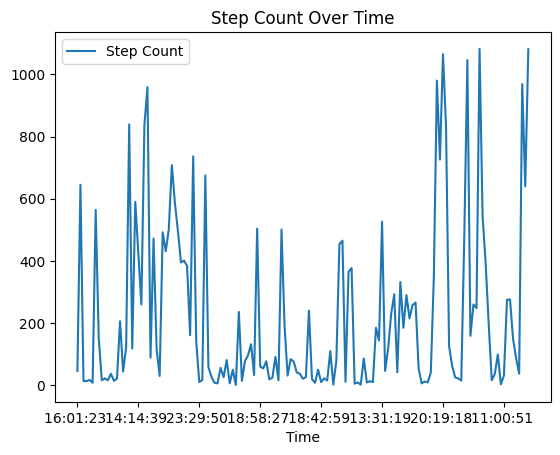

In [5]:
data.plot(kind='line',x="Time",y="Step Count",title="Step Count Over Time")
plt.show()

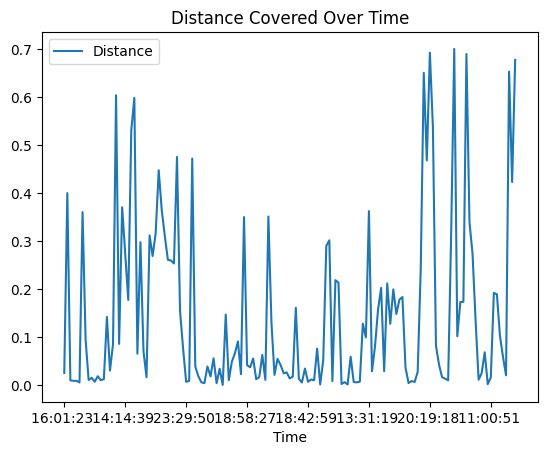

In [6]:
data.plot(kind='line',x="Time",y="Distance",title="Distance Covered Over Time")
plt.show()

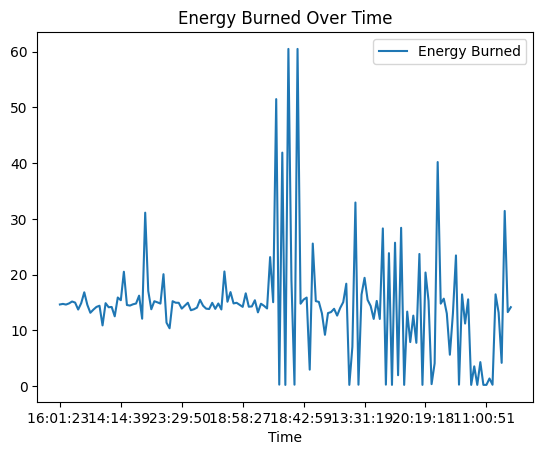

In [7]:
data.plot(kind='line',x="Time",y="Energy Burned",title="Energy Burned Over Time")
plt.show()

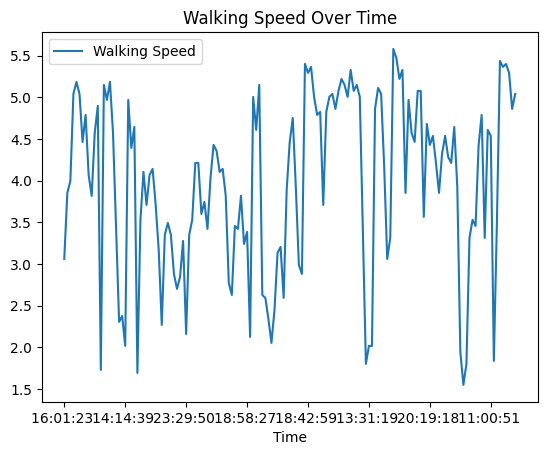

In [8]:
data.plot(kind='line',x="Time",y="Walking Speed",title="Walking Speed Over Time")
plt.show()

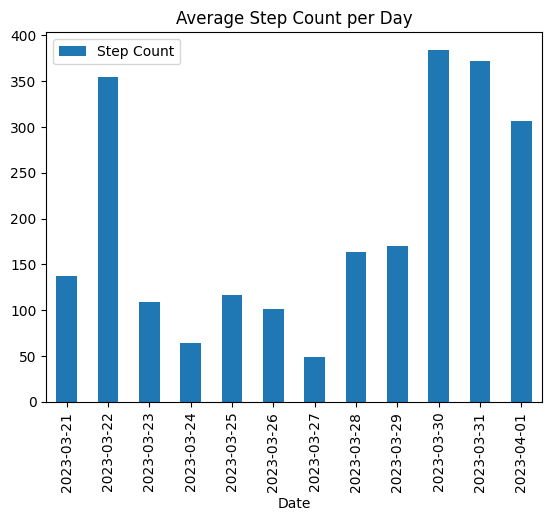

In [9]:
average_step_count_per_day = data.groupby("Date")["Step Count"].mean().reset_index()
average_step_count_per_day.plot(kind='bar',x="Date",y="Step Count",title="Average Step Count per Day")
plt.show()

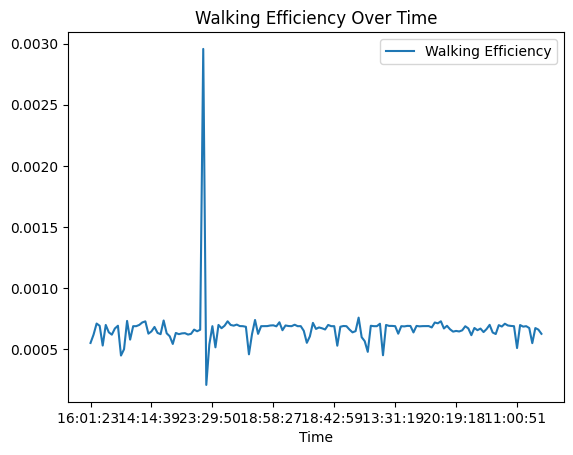

In [10]:
data["Walking Efficiency"] = data["Distance"] / data["Step Count"]
data.plot(kind='line',x="Time",y="Walking Efficiency",title="Walking Efficiency Over Time")
plt.show()

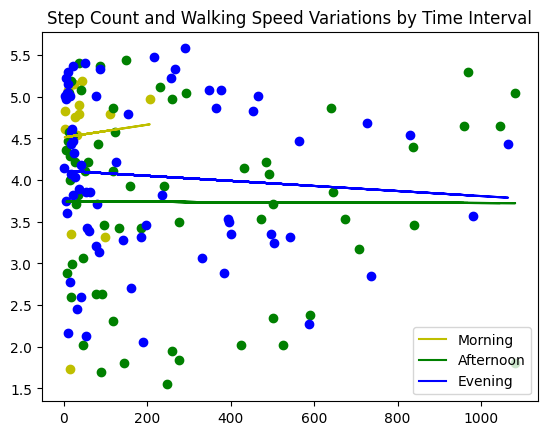

In [11]:
time_intervals = pd.cut(pd.to_datetime(data["Time"]).dt.hour,
                        bins=[0, 12, 18, 24],
                        labels=["Morning", "Afternoon", "Evening"], 
                        right=False)

data["Time Interval"] = time_intervals

grouped=data.groupby('Time Interval')

morning_data=grouped.get_group('Morning')
afternoon_data=grouped.get_group('Afternoon')
evening_data=grouped.get_group('Evening')

slope,intercept,rvalue,pvalue,stderr=stats.linregress(morning_data['Step Count'],morning_data['Walking Speed'])
plt.plot(morning_data['Step Count'],slope*morning_data['Step Count']+intercept,color='y',label='Morning')
slope,intercept,rvalue,pvalue,stderr=stats.linregress(afternoon_data['Step Count'],afternoon_data['Walking Speed'])
plt.plot(afternoon_data['Step Count'],slope*afternoon_data['Step Count']+intercept,color='g',label='Afternoon')
slope,intercept,rvalue,pvalue,stderr=stats.linregress(evening_data['Step Count'],evening_data['Walking Speed'])
plt.plot(evening_data['Step Count'],slope*evening_data['Step Count']+intercept,color='b',label='Evening')
plt.legend()

plt.scatter(morning_data["Step Count"], morning_data["Walking Speed"], color='y', label='Morning')
plt.scatter(afternoon_data["Step Count"], afternoon_data["Walking Speed"], color='g', label='Afternoon')
plt.scatter(evening_data["Step Count"], evening_data["Walking Speed"], color='b', label='Evening')

plt.title("Step Count and Walking Speed Variations by Time Interval")
plt.show()

C:\Users\berie\AppData\Local\Temp\ipykernel_3804\4106751766.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_avg_metrics = data.groupby("Date").mean().reset_index()


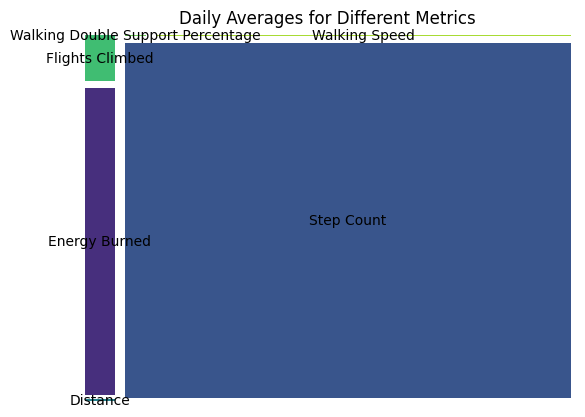

In [12]:
daily_avg_metrics = data.groupby("Date").mean().reset_index()

daily_avg_metrics_melted = daily_avg_metrics.melt(id_vars=["Date"], 
                                                  value_vars=["Step Count", "Distance", 
                                                              "Energy Burned", "Flights Climbed", 
                                                              "Walking Double Support Percentage", 
                                                              "Walking Speed"])

summed_values = daily_avg_metrics_melted.groupby('variable')['value'].sum().reset_index()

sizes = summed_values['value']
labels = summed_values['variable']
squarify.plot(sizes=sizes, label=labels, pad=0.25)

plt.title("Daily Averages for Different Metrics")
plt.axis('off')
plt.show()